<a href="https://colab.research.google.com/github/jieunjeon/ml-implementation-pytorch/blob/main/pytorch_tutorial/MNIST_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이웃집 토토치 파이토치 : Day 2 - 추가 실습
---

<div class="alert alert-info">
    <h4>Q1</h4>
    <p> 다음 코드는 keras를 이용한 mnist 손글씨 분류기를 학습시키는 과정을 나타내고 있다. 아래의 코드와 동등한 역할을 수행할 수 있는 코드를 pytorch를 이용하여 작성하라.</p>
</div>

- keras 코드

In [1]:
def show_hist_plot(acc, val_acc, loss, val_loss):
    import matplotlib.pyplot as plt

    fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(12, 4))

    loss_ax.plot(loss, 'b', label='train loss')
    loss_ax.plot(val_loss, 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(acc, 'b', label='train acc')
    acc_ax.plot(val_acc, 'r', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.legend(loc='upper left')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
______________________________________________

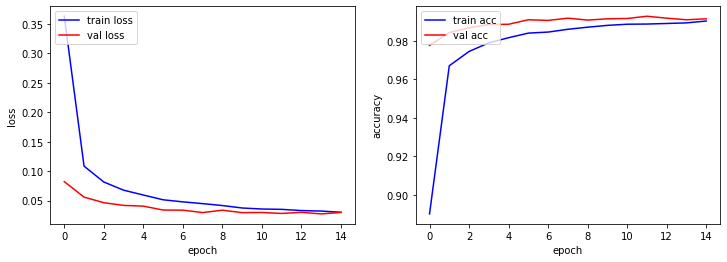

In [4]:
# 코드 출처 : https://keras.io/examples/vision/mnist_convnet/

########################################################### 
# Setup
###########################################################
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


########################################################### 
# Prepare the data
###########################################################
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



########################################################### 
# Build the model
###########################################################
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
print()

########################################################### 
# Train the model
###########################################################
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
show_hist_plot(hist.history['accuracy'], hist.history['val_accuracy'], 
               hist.history['loss'], hist.history['val_loss'])
print()

########################################################### 
# Evaluate the trained model
###########################################################
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

- 여기부터 작성 해주세요

In [5]:
########################################################### 
# Setup
###########################################################
import torch
import torchvision
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [11]:
########################################################### 
# Prepare the data
###########################################################
from torchvision.transforms import ToTensor, Lambda
from sklearn.model_selection import train_test_split
import numpy as np

from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [12]:
print(train_data)


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [13]:
print(test_data)


Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [14]:
print(train_data.data.size())
print(train_data.targets.size())


torch.Size([60000, 28, 28])
torch.Size([60000])


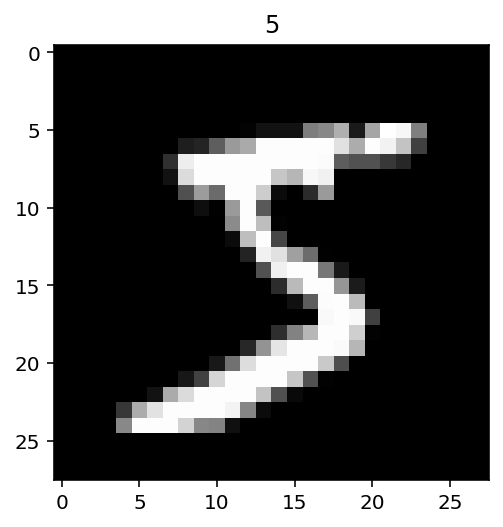

In [15]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

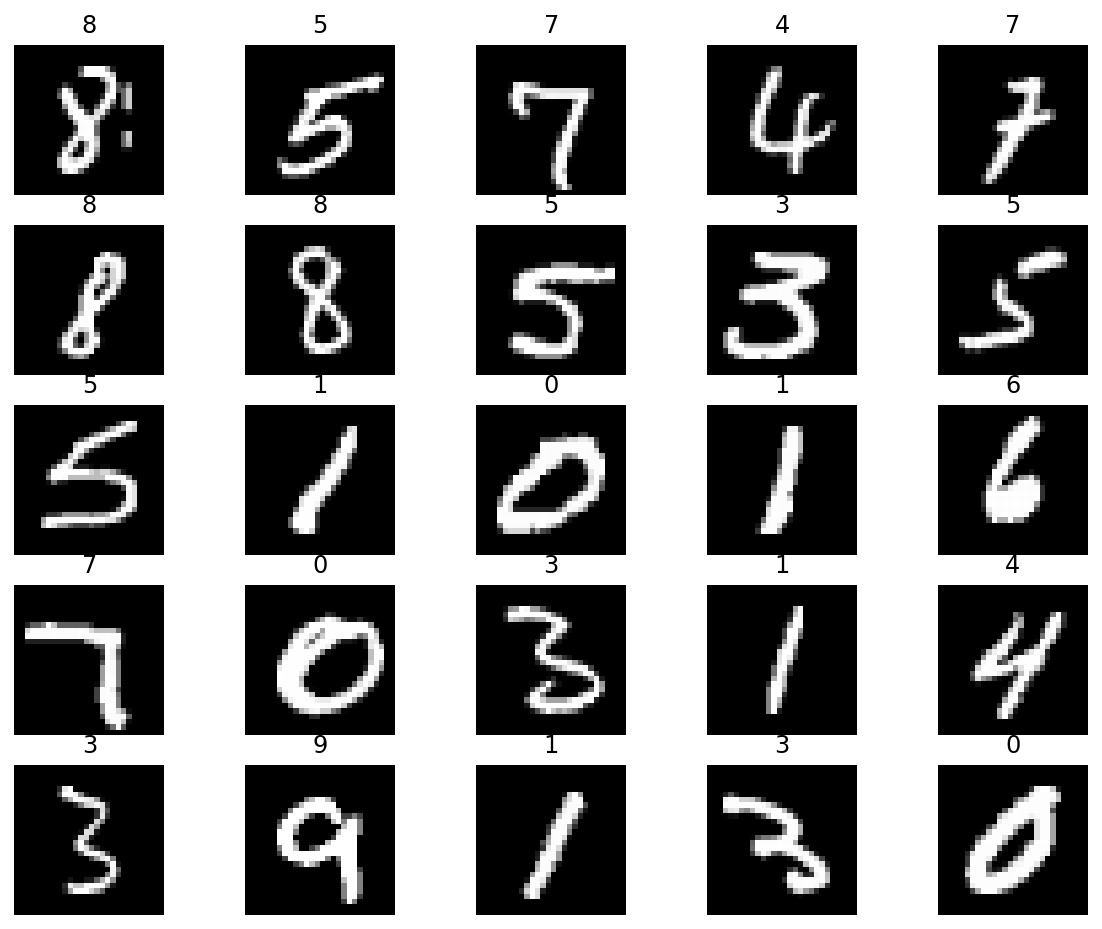

In [16]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [17]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7fa6c041f250>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7fa6c041fed0>}

In [18]:
########################################################### 
# Build the model
###########################################################

import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization



In [19]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [20]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [21]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [24]:
########################################################### 
# Train the model
###########################################################
# batch_size = 128
# epochs = 15

from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
              pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

# show_hist_plot()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [100/600], Loss: 0.1000
Epoch [1/10], Step [200/600], Loss: 0.1109
Epoch [1/10], Step [300/600], Loss: 0.1167
Epoch [1/10], Step [400/600], Loss: 0.0428
Epoch [1/10], Step [500/600], Loss: 0.0719
Epoch [1/10], Step [600/600], Loss: 0.1228
Epoch [2/10], Step [100/600], Loss: 0.0701
Epoch [2/10], Step [200/600], Loss: 0.0208
Epoch [2/10], Step [300/600], Loss: 0.0100
Epoch [2/10], Step [400/600], Loss: 0.0190
Epoch [2/10], Step [500/600], Loss: 0.0337
Epoch [2/10], Step [600/600], Loss: 0.1662
Epoch [3/10], Step [100/600], Loss: 0.1196
Epoch [3/10], Step [200/600], Loss: 0.0319
Epoch [3/10], Step [300/600], Loss: 0.0196
Epoch [3/10], Step [400/600], Loss: 0.0885
Epoch [3/10], Step [500/600], Loss: 0.0930
Epoch [3/10], Step [600/600], Loss: 0.0403
Epoch [4/10], Step [100/600], Loss: 0.0252
Epoch [4/10], Step [200/600], Loss: 0.0624
Epoch [4/10], Step [300/600], Loss: 0.1034
Epoch [4/10], Step [400/600], Loss: 0.0530
Epoch [4/10], Step [500/600], Loss: 0.0107
Epoch [4/10

In [26]:
########################################################### 
# Evaluate the trained model
###########################################################
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
        pass
test()



Test Accuracy of the model on the 10000 test images: 0.96


## Predict

In [27]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [28]:
actual_number = lbls[:10].numpy()
actual_number

array([8, 0, 7, 9, 1, 3, 3, 5, 3, 6])

In [29]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [8 0 7 9 1 3 3 5 3 5]
Actual number: [8 0 7 9 1 3 3 5 3 6]
